## RoHo
"The Ratio of Homoplasic Offspring (RoHo) is the log10 of the ratio of the descendents of a clade with a specific mutation to a sister clade without a mutation. It is negative when the clade with the mutation is smaller than its sister, and positive when it is larger.

As originally formulated, this metric assumes a bifurcating, fully resolved tree. As the MAT is not a resolved tree and contains many internal polytomies, we use the median size of all sister clades for calculation. The number of sister clades for each occurrence is included in the output table. The output table of summary is by-occurrence, so distributions of values associated with a specific homoplasic mutation can be selected by finding all rows with that mutation in the first column."

Here, I'm using the RoHo score calculated by matUtils to look at mutation type by gene.

In [4]:
import os
import pandas as pd
from Bio import Phylo
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import json

In [5]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [3]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [6]:
roho = pd.read_csv('usher/roho_usher_translations.tsv',sep='\t')

In [5]:
roho.head()

,node_id,nt_mutations,parent_node,child_count,offspring_with,median_offspring_without,single_roho,Unnamed: 7,aa_mutations,gene,aa_mutations_re1,codon_changes,leaves_sharing_mutations
0,node_5,G6734A,node_3,4,10,18,-0.255272,NaN,ORF1a:V2157I,ORF1a,V2157I,GTT>ATT,10
1,node_43,A12796C,node_23,5,18,10,0.255273,NaN,ORF1a:G4177G,ORF1a,G4177G,GGA>GGC,18
2,node_41,C11008T,node_23,5,6,16,-0.425969,NaN,ORF1a:H3581H,ORF1a,H3581H,CAC>CAT,6
3,node_33,C17733T,node_23,5,14,12,0.066947,NaN,ORF1b:F1422F,ORF1b,F1422F,TTC>TTT,14
4,node_24,C5826T,node_23,5,34,10,0.531479,NaN,ORF1a:T1854I,ORF1a,T1854I,ACA>ATA,34


In [7]:
def classify_muts(df):
    types = []
    start = df['aa_mutations_re1'].str[0]
    end = df['aa_mutations_re1'].str[-1]
    for s, e in zip(start,end):
        if s == e:
            types.append('synonymous')
        elif e == '*':
            types.append('nonsense')
        elif s == '*':
            types.append('stop_drop')
        else:
            types.append('missense')
    df['mut_type'] = types
    return df
    

In [8]:
roho_plus = classify_muts(roho)

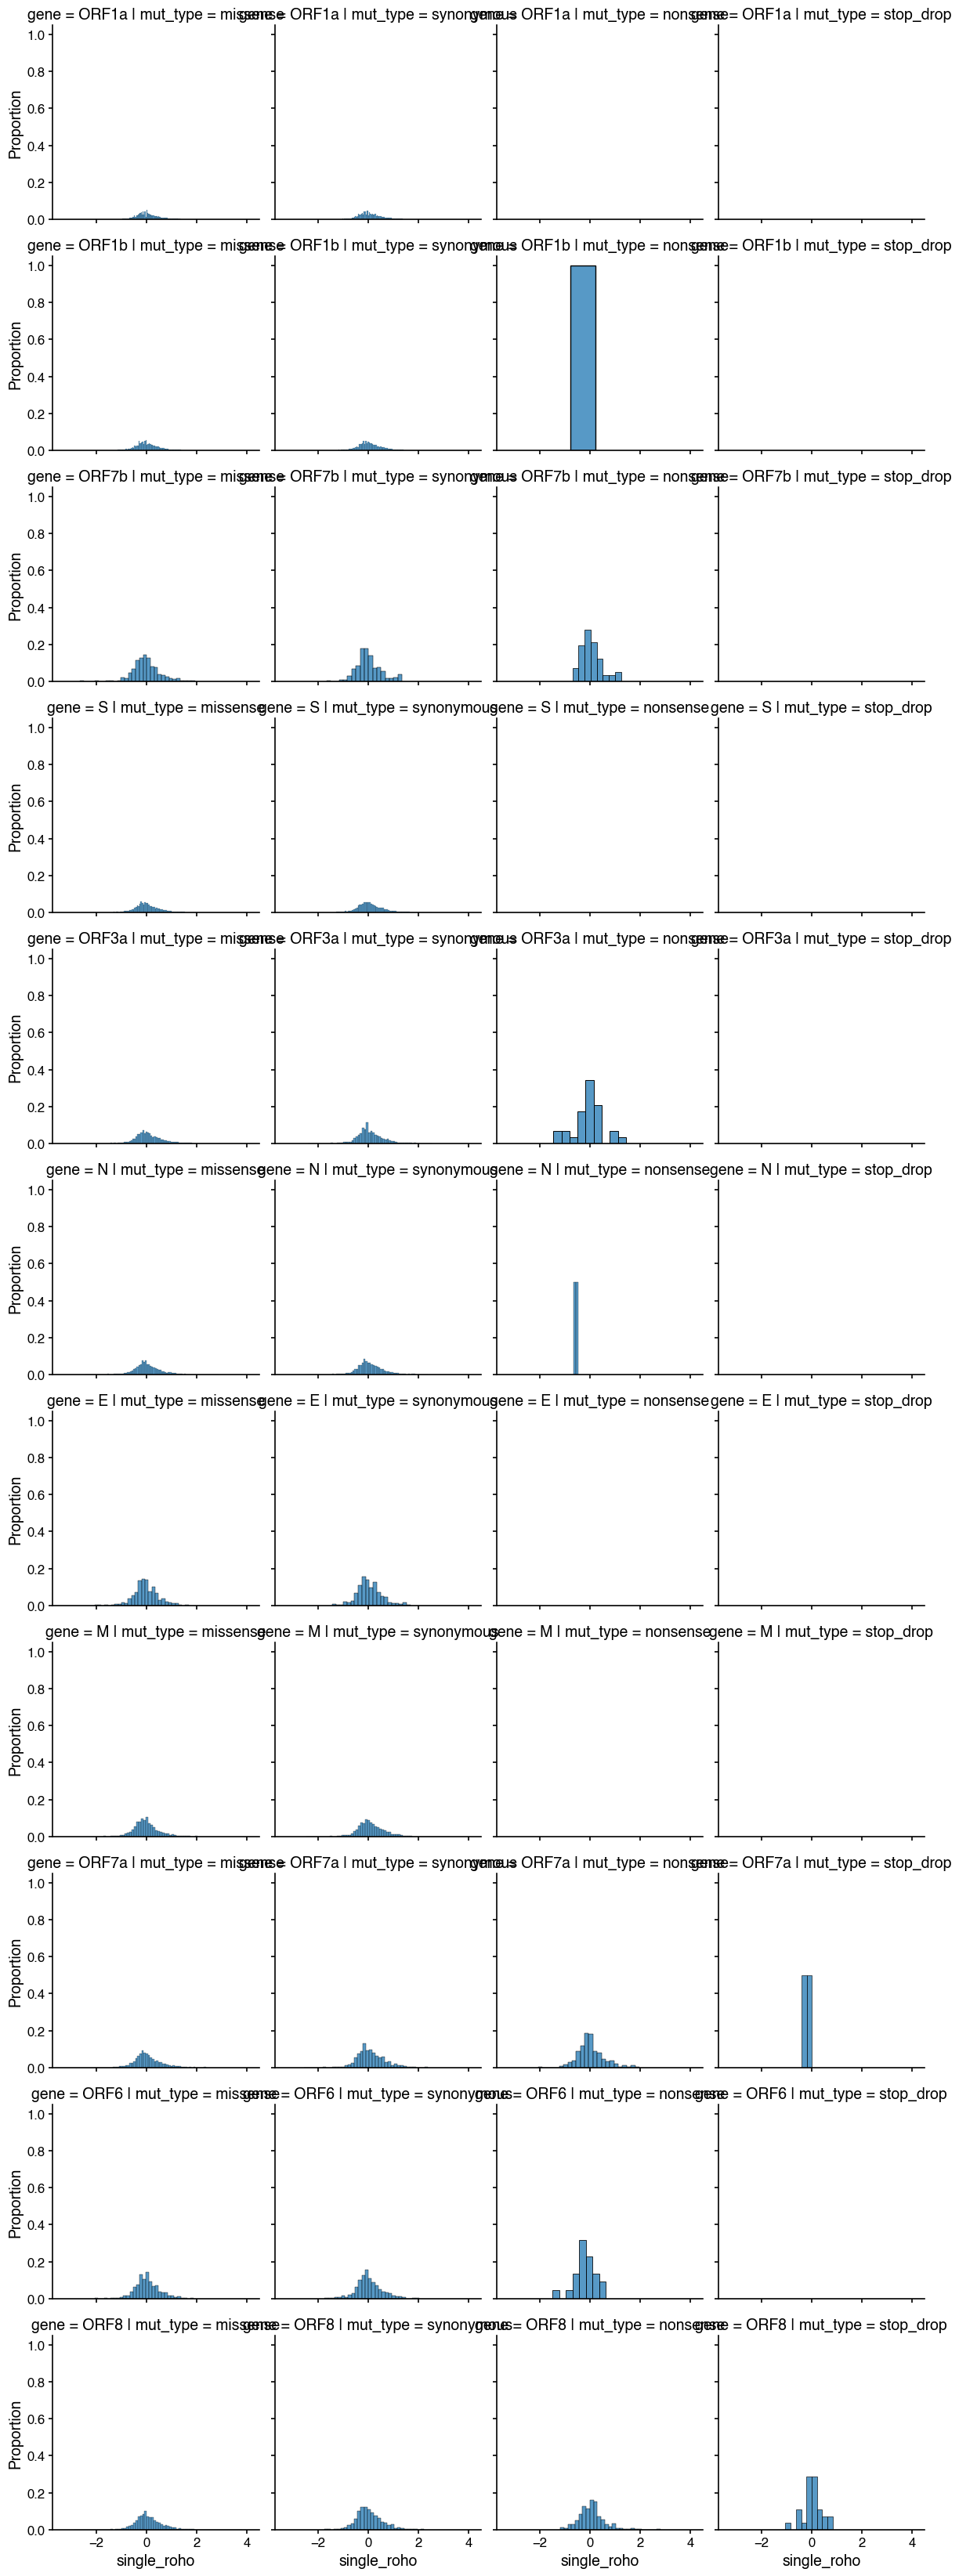

In [15]:
g = sns.FacetGrid(roho_plus, col="mut_type",  row="gene")
g.map(sns.histplot, "single_roho",stat='proportion')

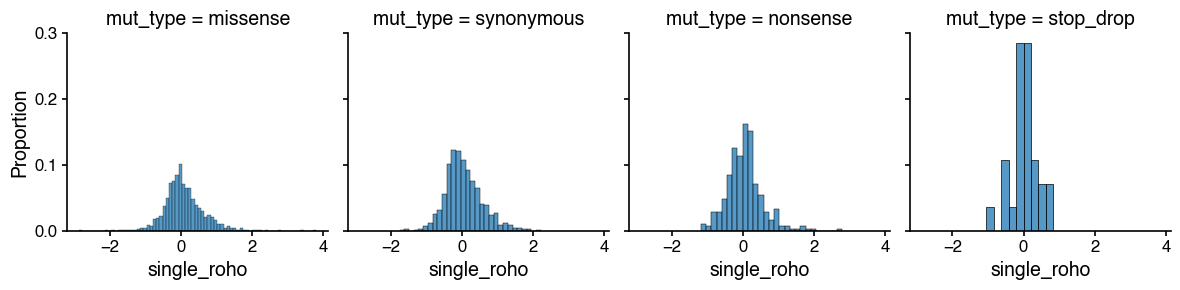

In [16]:
g = sns.FacetGrid(roho_plus[roho_plus.gene=='ORF8'], col="mut_type")
g.map(sns.histplot, "single_roho",stat='proportion')

In [9]:
st.ttest_ind(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'synonymous')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'nonsense')]['single_roho'], equal_var=False)


Ttest_indResult(statistic=-0.27175326318963144, pvalue=0.78590708702941)

In [13]:
st.mannwhitneyu(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'synonymous')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'nonsense')]['single_roho'])


MannwhitneyuResult(statistic=112976.5, pvalue=0.6365835431791821)

In [10]:
st.ttest_ind(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'synonymous')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'missense')]['single_roho'], equal_var=False)


Ttest_indResult(statistic=-0.9900322220371606, pvalue=0.32234890078582135)

In [14]:
st.mannwhitneyu(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'synonymous')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'missense')]['single_roho'])


MannwhitneyuResult(statistic=897352.0, pvalue=0.22896379319756544)

In [11]:
st.ttest_ind(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'nonsense')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'missense')]['single_roho'], equal_var=False)


Ttest_indResult(statistic=-0.3979024892453197, pvalue=0.6909150471080099)

In [15]:
st.mannwhitneyu(roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'nonsense')]['single_roho'], roho_plus[(roho_plus.gene=='ORF8')&(roho.mut_type == 'missense')]['single_roho'])


MannwhitneyuResult(statistic=379368.0, pvalue=0.7675897515181782)